# Symbolic Aggregate approXimation *(SAX)* Encoding
## Distance DEMO

In [1]:
# at first time install pynuTS with this command
#!pip install git+https://github.com/nickprock/pynuTS.git@main

In [2]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [4]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [5]:
time = np.arange(120)

np.random.seed(42)
a = np.random.randn(10)
b = np.random.beta(a[0], a[-1], 10)
c = np.random.normal(loc = 10, scale=0.05,size=10)
list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a[i], b[i], c[i]) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [6]:
X = pd.DataFrame(list_series).T

In [7]:
X

,0,1,2,3,4,5,6,7,8,9
0,3.328307,6.352554,1.685586,1.012429,4.270506,4.506503,2.873014,2.595026,5.761624,6.976778
1,7.678760,4.387684,3.154136,5.823277,5.552540,4.473484,8.050503,5.953947,5.772076,5.624840
2,8.276144,3.863630,7.472882,8.884985,3.314720,3.475594,9.084350,7.787704,3.510633,8.037343
3,6.659247,3.359212,9.171613,10.180646,4.989495,4.083829,12.050211,8.505538,3.164621,8.088966
4,7.574663,4.906448,8.278442,11.771804,3.439092,2.387475,7.637881,10.795919,3.116288,9.767853
...,...,...,...,...,...,...,...,...,...,...
115,9.506185,0.051421,10.928279,10.002605,0.399049,-0.125851,8.387183,10.525592,1.937231,9.704234
116,8.333668,2.117953,10.191224,9.178141,-1.183515,0.786591,8.632203,9.572930,-1.210225,10.466909
117,10.415191,-1.777842,9.993408,10.753647,1.619491,-0.102302,11.598393,10.302873,-0.431102,10.561905
118,8.707114,-2.108392,9.714941,10.563193,1.269602,-1.110530,10.870299,8.698905,1.394113,8.661881


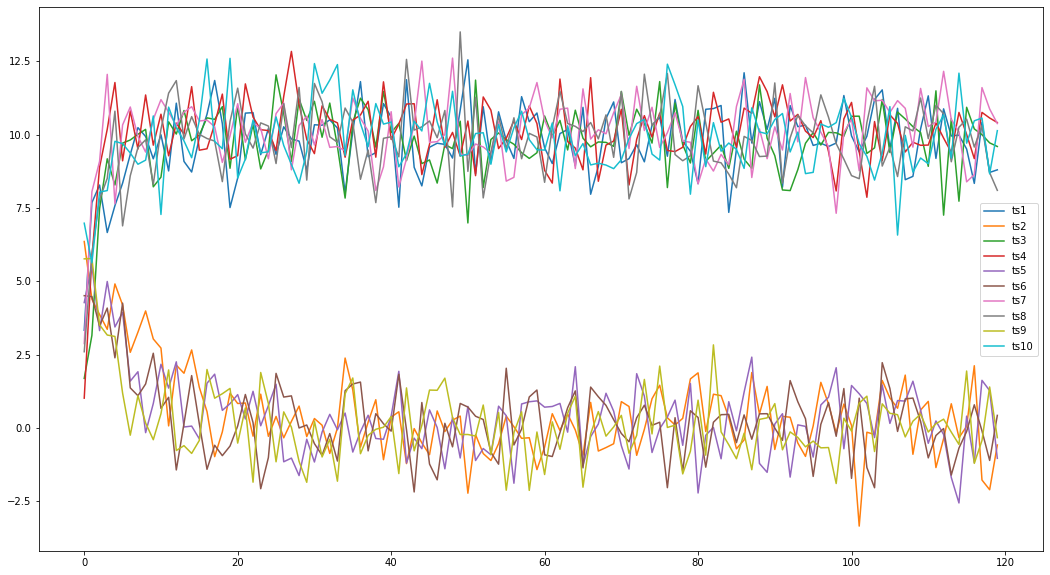

In [8]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Distance Matrix with SAX Encoding

We choose a window size 12. We reduct the 120 periods in 10 periods, a letter is a year.
You transpose X because each row must be a time series and each column a timestep.

In [9]:
sax = NaiveSAX(windows=24)

In [10]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X.T)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** consisting in taking the mean over back-to-back points. This decreases the number of points and reduces noise while preserving the trend of the time series.
The labels for each level form the **SAX String** (like *'AAA'*)

<br>

![PAA](https://www.researchgate.net/profile/Bill-Chiu-2/publication/221653289/figure/fig7/AS:668838362349575@1536474900462/Symbolic-aggregate-approximation-of-a-time-series-as-the-four-letter-word-dbad-The.ppm)

<br>

In [11]:
sax_strings

array(['ABCCB', 'CBACB', 'ACBBC', 'ACBCB', 'CABBC', 'CBCBA', 'ABCBC',
       'ACCBB', 'CBABC', 'ACBCB'], dtype='<U5')

### Choose the distance: Hamming
In information theory, the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) between two strings of equal length is the number of positions at which the corresponding symbols are different.

Use the [scipy version](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html)


In [12]:
from scipy.spatial.distance import hamming

In [13]:
print("The distance between ", sax_strings[0], " and ", sax_strings[1], " is: ",hamming(list(sax_strings[0]), list(sax_strings[1])))

The distance between  ABCCB  and  CBACB  is:  0.4


In [15]:
# very dummy loop
for i in range(len(sax_strings)):
    for j in range(len(sax_strings)):
        print("The distance between ", sax_strings[i], " and ", sax_strings[j], " is: ",hamming(list(sax_strings[i]), list(sax_strings[j])))

The distance between  ABCCB  and  ABCCB  is:  0.0
The distance between  ABCCB  and  CBACB  is:  0.4
The distance between  ABCCB  and  ACBBC  is:  0.8
The distance between  ABCCB  and  ACBCB  is:  0.4
The distance between  ABCCB  and  CABBC  is:  1.0
The distance between  ABCCB  and  CBCBA  is:  0.6
The distance between  ABCCB  and  ABCBC  is:  0.4
The distance between  ABCCB  and  ACCBB  is:  0.4
The distance between  ABCCB  and  CBABC  is:  0.8
The distance between  ABCCB  and  ACBCB  is:  0.4
The distance between  CBACB  and  ABCCB  is:  0.4
The distance between  CBACB  and  CBACB  is:  0.0
The distance between  CBACB  and  ACBBC  is:  1.0
The distance between  CBACB  and  ACBCB  is:  0.6
The distance between  CBACB  and  CABBC  is:  0.8
The distance between  CBACB  and  CBCBA  is:  0.6
The distance between  CBACB  and  ABCBC  is:  0.8
The distance between  CBACB  and  ACCBB  is:  0.8
The distance between  CBACB  and  CBABC  is:  0.4
The distance between  CBACB  and  ACBCB  is:  0.6


## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
